In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # 画图模块
import matplotlib.dates as mdates # 日期格式处理模块
from matplotlib import style # 用来自定义图表风格的模块

# magic command
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 提高分辨率

# from matplotlib.font_manager import FontProperties # 画图自定义字体
# from pylab import mpl # 画图自定义字体
# mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
# # mpl.rcParams['font.family'] = 'Times New Roman' # 指定默认字体

In [8]:
# 导入处理
data = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/000001xin.csv')
data['Day'] = pd.to_datetime(data['Day'],format = '%Y/%m/%d')
data.set_index('Day',inplace = True)
data['Close'] = pd.to_numeric(data['Close'],errors = 'coerce')
data['Preclose'] = data['Close'].shift(1)
data['Return'] = (data['Close'] - data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.050,99.980,95.790,99.980,126000.00,4.940000e+05,NaN
1990-12-20,99.980,104.300,104.390,99.980,104.390,19700.00,8.400000e+04,0.044109
1990-12-21,104.390,109.070,109.130,103.730,109.130,2800.00,1.600000e+04,0.045407
1990-12-24,109.130,113.570,114.550,109.130,114.550,3200.00,3.100000e+04,0.049666
1990-12-25,114.550,120.090,120.250,114.550,120.250,1500.00,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


Monthly Return

In [9]:
data_new = data['1995-01-01':'2024-12-31'].copy()
Month_data = data_new.resample('M')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


月收益率图

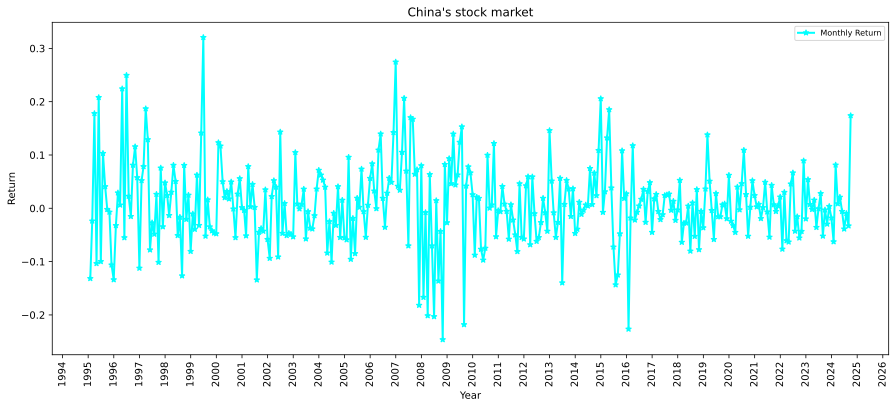

In [11]:
fig, ax = plt.subplots(figsize = (15,6))

ax.plot('Return', # 图片数据
'*-', # 图片类型,
color = '#00FFFF', # 图片颜色
label = 'Monthly Return', # 图片标签
linewidth = 2, # 图片线宽
data = Month_data) # 图片数据来源
ax.set_title("China's stock market") # 图片标题
ax.set_ylabel('Return') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
plt.show();

描述性统计
均值 mean

In [12]:
np.mean(Month_data['2000':'2024']['Return'])

0.005529576142575528

In [13]:
Month_data['2000':'2024']['Return'].mean().round(4)

0.0055

In [14]:
round(Month_data['2000':'2024']['Return'].mean(),4)

0.0055

In [15]:
print('中国股票市场平均月收益率为:',round(Month_data['2000':'2024']['Return'].mean()*100,4),"%",sep='')

中国股票市场平均月收益率为:0.553%


In [17]:
Quarter_data = data_new.resample('Q')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
print('中国股票市场平均季度收益率为:',round(Quarter_data['2000':'2024']['Return'].mean()*100,4),"%",sep='')

中国股票市场平均季度收益率为:1.8704%


In [18]:
sum(Month_data['2000':'2024']['Return']) / len(Month_data['2000':'2024']['Return'])

0.005529576142575525

In [19]:
sum(Month_data['2000':'2024']['Return']) / len(Month_data['2000':'2024']['Return'])

0.005529576142575525

分位数

In [20]:
from statistics import quantiles
quantiles(Month_data['2000':'2024']['Return'],n = 10)

[-0.06864738437339708,
 -0.048127928717510995,
 -0.0256577261430311,
 -0.006190944913624574,
 0.004453785546283395,
 0.018812575594151015,
 0.035870471048765264,
 0.052147828136706396,
 0.08994844112131037]

In [21]:
Month_data[Month_data['Return'] > 0.2]

,Return
Day,
1995-05-31,0.207922
1996-04-30,0.224249
1996-06-30,0.249514
1999-06-30,0.320558
2006-12-31,0.274464
2007-04-30,0.206437
2014-12-31,0.205692


方差/标准差

In [23]:
Month_variance = data_new.resample('M')['Return'].var().to_frame()
Month_variance.rename(columns = {'Return':'Variance'},inplace = True)
Month_variance

,Variance
Day,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2024-05-31,0.000048
2024-06-30,0.000031
2024-07-31,0.000065


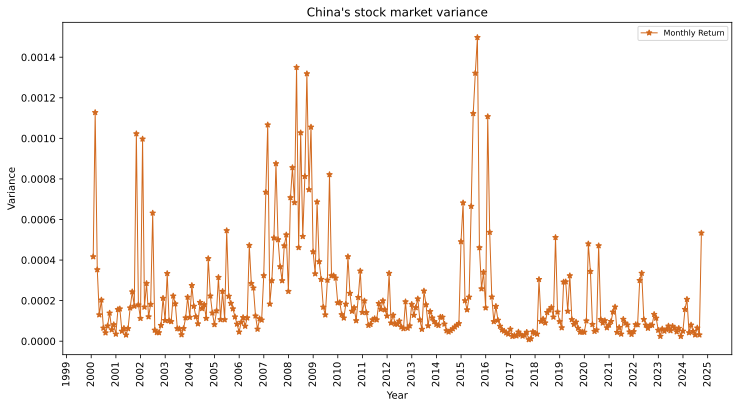

In [29]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot('Variance', # 图片数据
'*-', # 图片类型,
color = '#D2691E', # 图片颜色
label = 'Monthly Return', # 图片标签
linewidth = 1, # 图片线宽
data = Month_variance['2000':]) # 图片数据来源
ax.set_title("China's stock market variance") # 图片标题

ax.set_ylabel('Variance') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())


# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
plt.show();

In [30]:
Month_variance = data_new.resample('M')['Return'].apply(lambda x: sum(x**2)).to_frame()
Month_variance.rename(columns = {'Return':'Variance'},inplace = True)
Month_variance

,Variance
Day,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


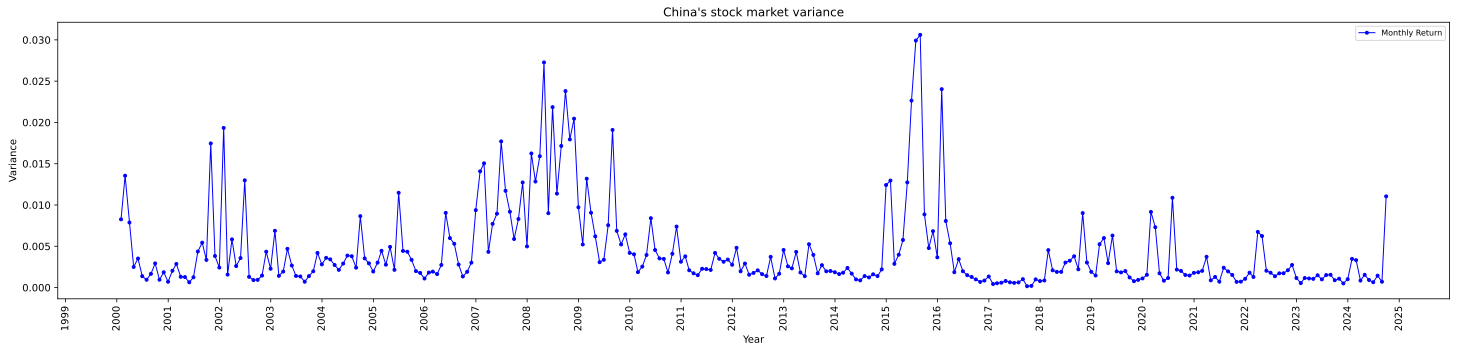

In [32]:
fig, ax = plt.subplots(figsize = (25,5))

ax.plot('Variance', # 图片数据
'.-', # 图片类型,
color = 'b', # 图片颜色
label = 'Monthly Return', # 图片标签
linewidth = 1, # 图片线宽
data = Month_variance['2000':]) # 图片数据来源
ax.set_title("China's stock market variance") # 图片标题

ax.set_ylabel('Variance') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())


# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
plt.show();

偏度 skewness

In [33]:
len(data_new[data_new['Return'] > 0]) / len(data_new)

0.5226360238128201

In [34]:
len(Month_data[Month_data['Return'] > 0]) / len(Month_data)

0.5266106442577031

In [35]:
Quarter_data = data_new.resample('Q')['Return'].apply(lambda x: (1+x).prod()-1).to_frame()
len(Quarter_data[Quarter_data['Return'] > 0]) / len(Quarter_data)

0.5126050420168067

In [36]:
# 日数据偏度
data_new['Return'].skew()

0.702469614038669

In [37]:
Month_data['Return'].skew()

0.32934257444025805

In [38]:
Quarter_data['Return'].skew()

0.8675023353736133